-----------------------------------

Import Python Required Libaries 

----------------------------------

In [1]:
#Import needed libariries
import pandas as pd #For data analysis
import numpy as np #For data calculations
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting

---------------------------------

Data Card

--------------------------------

<table border="1">
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Source Sheet</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Route</td>
      <td>All Sheets</td>
      <td>Route code which indicates to which route this data belongs</td>
    </tr>
    <tr>
      <td>SR_Code</td>
      <td>Any Sheet</td>
      <td>Sales Buzz Code which indicates to which SR_Name this Data Belongs</td>
    </tr>
    <tr>
      <td>SR_Name</td>
      <td>Any Sheet</td>
      <td>Employee Full Name</td>
    </tr>
    <tr>
      <td>SR Title</td>
      <td>Any Sheet</td>
      <td>Indicates The Title for Each Employer</td>
    </tr>
    <tr>
      <td>Sub-Sales_Channel</td>
      <td>Any Sheet</td>
      <td>Indicates the sales channel which the Employee works on weather it's Ms(Mass Sale),WS(Whole Sale),RS(Residential Sales)and KR ( Key Residential)</td>
    </tr>
    <tr>
      <td>Sub_Sales_KPIs</td>
      <td>Strike Rate (actual)</td>
      <td>Indicates which type of Kpi Describes the Value column, in this case, it indicates the number of visits</td>
    </tr>
    <tr>
      <td>Value</td>
      <td>Strike Rate (actual)</td>
      <td>Indicates the number of visits</td>
    </tr>
    <tr>
      <td>Value</td>
      <td>Strike Rate (Target)</td>
      <td>Indicates the Target +ve Visits % for this route</td>
    </tr>
    <tr>
      <td>Value</td>
      <td>Jumbo Sales (actual)</td>
      <td>Indicates the Number of sold Items</td>
    </tr>
    <tr>
      <td>Value</td>
      <td>Jumbo Sales (Target)</td>
      <td>Indicates the target total number of items per 25 working days</td>
    </tr>
    <tr>
      <td>Value</td>
      <td>Total Sales per Route (actual)</td>
      <td>Indicates the Total number of sold items per route</td>
    </tr>
    <tr>
      <td>Value</td>
      <td>Total Sales per Route (Target)</td>
      <td>Indicates the target number of sold items per route per 25 working days</td>
    </tr>
  </tbody>
</table>


----------------------------------

Import All Need Sheet For the Sales Analysis 

--------------------------------

In [2]:
#Import Routes total sales data
df_route_act = pd.read_excel(r'C:\Users\CompuMax\Downloads\Kylogs\Total Sales for Route.xlsx')
df_route_tr = pd.read_excel(r'C:\Users\CompuMax\Downloads\Kylogs\Total Sales for Route.xlsx', 'Target Data')
#Import Jumbo total sales data
df_jumbo_ac = pd.read_excel(r'C:\Users\CompuMax\Downloads\Kylogs\Jumbo Sales.xlsx')
df_jumbo_tr = pd.read_excel(r'C:\Users\CompuMax\Downloads\Kylogs\Jumbo Sales.xlsx', "Target Data")
#Import Strike total sales data
df_strike_act = pd.read_excel(r'C:\Users\CompuMax\Downloads\Kylogs\Strike Rate.xlsx')
df_strike_tr = pd.read_excel(r'C:\Users\CompuMax\Downloads\Kylogs\Strike Rate.xlsx', "Target Data")
#Import Router Mapping sales data
df_router_mapping = pd.read_excel(r'C:\Users\CompuMax\Downloads\Kylogs\Routr Mapping.xlsx',"Route Mapping")

-----------------------------------------

Sales Team Data Analysis 

------------------------------

Strike Rate Sheet

In [3]:
# Create Count for every data point to use later on
df_strike_act["day_count"] = 1

# Group the data by "Route","Sub_Sales_KPIs","SR_Name" and calculate the sum of Actual Sales 
df_strike1 = df_strike_act.groupby(["Route", "SR_Code", "SR_Name", "SR Title", "Sub-Sales_Channel", "Sub_Sales_KPIs"])[["Value", "day_count"]].sum().reset_index()


# Pivot the table based on the column 'Sub-Sales_KPIs'
strike_mini_master = df_strike1.pivot_table(index=["Route","SR_Code","SR_Name","SR Title","Sub-Sales_Channel"], columns='Sub_Sales_KPIs', values=['Value', 'day_count'], aggfunc='sum')


# Reset index
strike_mini_master.reset_index(inplace=True)

# Rename the index to "index"
strike_mini_master = strike_mini_master.rename(columns={'index': 'index'})

# Rename the columns
strike_mini_master.columns = ["Route","SR_Code","SR_Name","SR Title","Sub-Sales_Channel",'Strike_Total_Visits', 'Strike_Total_+Ve_Visits', 'Total_Visits_days', 'Total_+Ve_Visits_days']

# Calculate the success rate
strike_mini_master["Success_Rate"] = strike_mini_master["Strike_Total_+Ve_Visits"] / strike_mini_master["Strike_Total_Visits"]

# Merge strike_mini_master with df_strike_tr on the "Route" column
strike_Master = pd.merge(strike_mini_master, df_strike_tr[['Route', 'Value']], on='Route', how='left')

# Rename the "Value" column from df_strike_tr to avoid conflicts
strike_Master.rename(columns={'Value': 'Target_success_rate'}, inplace=True)



Jumbo Sheet Data

In [4]:
# Rename the "Value" column
df_jumbo_ac.rename({"Value": 'Total_Sales_jumbo'}, axis=1, inplace=True)

# Rename the "Value" column
df_jumbo_tr.rename({'Value': 'Target_value_jumbo'}, axis=1, inplace=True)


In [5]:
# Add a day count column
df_jumbo_ac["jumbo_days_count"] = 1

# Group the data
jumbo_mini_master = df_jumbo_ac.groupby(["Route", "SR_Code", "SR_Name", "SR Title", "Sub-Sales_Channel"])[["Total_Sales_jumbo", "jumbo_days_count"]].sum().reset_index()

# Merge the data
jumbo_master = pd.merge(jumbo_mini_master, df_jumbo_tr[['Route', 'Target_value_jumbo']], on='Route', how='left')

# Calculate the actual target
jumbo_master["Actual_Target_jumbo"] = ((jumbo_master["Target_value_jumbo"] / 25) * jumbo_master["jumbo_days_count"])

# Calculate the percentage of target achieved
jumbo_master["jumbo Sales Achi %"] = (jumbo_master["Total_Sales_jumbo"]) / (jumbo_master["Actual_Target_jumbo"])


Total Sales Route

In [6]:
#Rename SR_Title column to SR Title To match with other sheets 
df_route_act.rename({"SR_Title": "SR Title"}, axis=1, inplace=True)

In [10]:
#Create Count for days
df_route_act["day count"]=1

#Create New DataFrame with the desired data Only
route_mini_master = df_route_act.groupby(["Route","SR_Code","SR_Name","SR Title","Sub-Sales_Channel"])[["Value","day count"]].sum().reset_index()

# Rename the "Value" column from df_jumbo_tr to avoid conflicts
df_route_tr.rename(columns={'Value': 'Target_value_route'}, inplace=True)

# Merge jumbo_mini_master with df_jumbo_tr on the "Route" column
route_master = pd.merge(route_mini_master, df_route_tr[['Route', 'Target_value_route']], on='Route', how='left')

#Calculate the actual target for route per actual days
route_master["Actual_Target_Route"]=((route_master["Target_value_route"] / 25 )*route_master["day count"] )

#Calcualte the percentage of Target acheived 
route_master["Target_acheivment_Percentage"] = (route_master["Value"])/(route_master["Actual_Target_Route"])


In [11]:
#Rename to avoid contradication
route_master.rename({"Value":" Route Total Sales"},axis=1,inplace=True)

In [12]:
route_master.rename({"Target_acheivment_Percentage":"Total Sales Achi %"},axis=1,inplace=True)

Merge The Sales Data

In [13]:
merged_data = pd.merge(route_master, jumbo_master, on=["Route", "SR_Code", "SR_Name", "SR Title", "Sub-Sales_Channel"], how="outer")
Report_Data = pd.merge(merged_data, strike_Master, on=["Route", "SR_Code", "SR_Name", "SR Title", "Sub-Sales_Channel"], how="outer")


In [14]:
#Rename Columns to be as The KPI Report 
Report_Data.rename(columns={"day count":"Act WDs","Success_Rate":"Strike % Achiv. %", "Target_success_rate":"Strike KPI Min Achi %"," Route Total Sales":"Act Sales Crt", 
                            "Actual_Target_Route" : "Adj TGT Sales Crt","jumbo Sales Achi %":"jumbo Sales Achiv %","Total Sales Achi %":"Sales Achiv %" }, inplace=True
                            )

In [15]:
#Drop the unwanted Columns
Report_Master = Report_Data[['Route', 'SR_Code', 'SR_Name', 'SR Title', 'Sub-Sales_Channel',"Act WDs", "Act Sales Crt", "Adj TGT Sales Crt","Sales Achiv %","jumbo Sales Achiv %" , "Strike % Achiv. %" ]]

In [ ]:
#create Sales KPI Min Achiv. % columns
Report_Master["Sales KPI Min Achiv. %"]= 0.8

#create Sales Jumbo Min Achiv. % columns
Report_Master["Sales Jumbo Min Achiv. %"]= 0.8

#create Strike KPI Min Achiv. % columns
Report_Master["Strike KPI Min Achiv. %"]= 0.9


In [ ]:
# Define the function to calculate the sales payout percentage
def Sales_payout_percent(sub_sales_channel):
    if sub_sales_channel == "WS":
        return 0.7
    elif sub_sales_channel == "RS":
        return 0.6
    else:
        return 0

# Apply the function to create the Sales Payout % column
Report_Master["Sales Payout %"] = Report_Master["Sub-Sales_Channel"].apply(Sales_payout_percent)

#Create the Sales Jumpo Payout column
Report_Master["Sales Jumbo Payout %"] = 0.1

In [ ]:
# Define the function to calculate the strike payout percentage
def Strike_payout_percent(sub_sales_channel):
    if sub_sales_channel == "WS":
        return 0.1
    elif sub_sales_channel == "RS":
        return 0.15
    else:
        return 0

# Apply the function to create the Sales Payout % column
Report_Master["Strike % Payout %"] = Report_Master["Sub-Sales_Channel"].apply(Strike_payout_percent)

In [21]:
# Define the payout_calculator function with customizable columns
def payout_calculator(row, sales_col, target_min_col, sales_payout_col):
    sales_value = row[sales_col]
    target_min = row[target_min_col]
    sales_payout = row[sales_payout_col]
    
    if target_min < sales_value < 1.5:
        return sales_value * sales_payout
    elif sales_value >= 1.5:
        return 1.5 * sales_payout
    else:
        return 0

# Apply the function to each row with customizable columns and assign values using .loc
Report_Master["Total Sales Payout%"] = Report_Master.apply(
    lambda row: payout_calculator(row, "Sales Achiv %", "Sales KPI Min Achiv. %", "Sales Payout %"),
    axis=1
)

# Apply the function to each row with customizable columns and assign values using .loc
Report_Master["jumbo Sales Payout%"] = Report_Master.apply(
    lambda row: payout_calculator(row, "jumbo Sales Achiv %", "Sales Jumbo Min Achiv. %", "Sales Jumbo Payout %"),
    axis=1
)

# Apply the function to each row with customizable columns and assign values using .loc
Report_Master["Strike Payout%"] = Report_Master.apply(
    lambda row: payout_calculator(row, "Strike % Achiv. %", "Strike KPI Min Achiv. %", "Strike % Payout %"),
    axis=1
)

# Assign values to "Total Payout%" using .loc
Report_Master["Total Payout%"] = Report_Master["Total Sales Payout%"] + Report_Master["jumbo Sales Payout%"] + Report_Master["Strike Payout%"]



In [22]:
#EXPORT FILE TO EXCEL
file_path = r"C:\Users\CompuMax\Downloads\Kylogs\Project Data\Report_Master.xlsx"
Report_Master.to_excel(file_path, index=False)

---------------------------------------

Sales Data Analysis

----------------------------------------

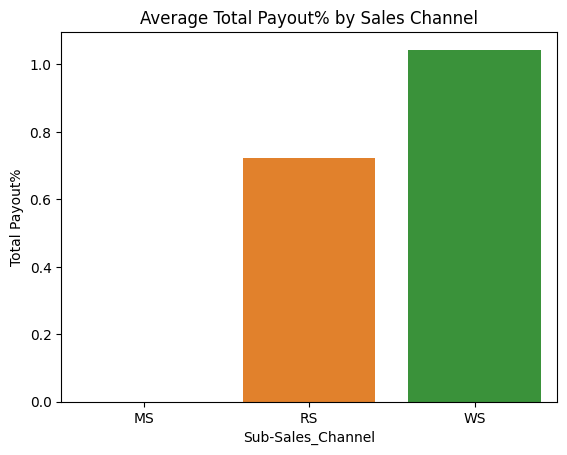

In [ ]:
# Performance Analysis by Sales Channel
channel_performance = Report_Master.groupby('Sub-Sales_Channel')['Total Payout%'].mean().reset_index()
ax= sns.barplot(x='Sub-Sales_Channel', y='Total Payout%',hue='Sub-Sales_Channel', data=channel_performance)
ax.set_title('Average Total Payout% by Sales Channel')
plt.show()

As you can see Whole sales Channel comes with higher Incentive in avarage maybe this is because of the high dependency on actual sales 70% from Incentive 

C:\Users\CompuMax\AppData\Local\Temp\ipykernel_32332\2731632324.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


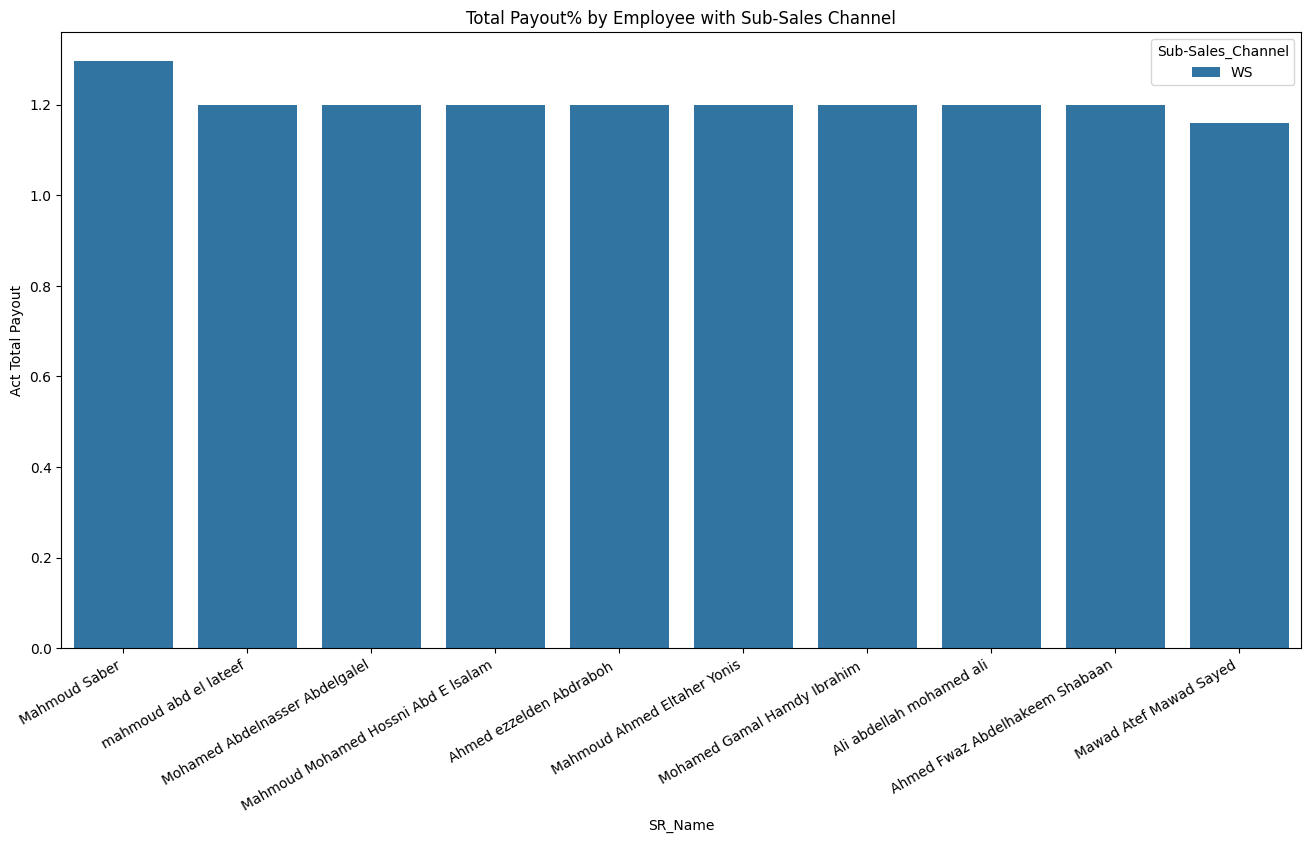

In [ ]:
# Employee Performance Evaluation
employee=Report_Master
employee["Repeated"]= 1
# Grouping and calculating the actual total payout
employee_performance = employee.groupby(['SR_Name', 'Sub-Sales_Channel'])[['Total Payout%', 'Repeated']].sum().reset_index()
employee_performance['Act Total Payout'] = employee_performance['Total Payout%'] / employee_performance['Repeated']

# Sort values by 'Act Total Payout'
employee_performance = employee_performance.sort_values(by='Act Total Payout', ascending=False)

# Filter to top 10 employees
top_10_performance = employee_performance.head(10)

# Adjust the size of the plot
plt.figure(figsize=(16, 8))

# Create the barplot with hue
ax = sns.barplot(x='SR_Name', y='Act Total Payout', hue='Sub-Sales_Channel', data=top_10_performance)

# Set the title of the plot
ax.set_title('Total Payout% by Employee with Sub-Sales Channel')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()

This Graph confirms the last one as most of the employee with high payouts are working in the WS Channel

C:\Users\CompuMax\AppData\Local\Temp\ipykernel_32332\1841644334.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


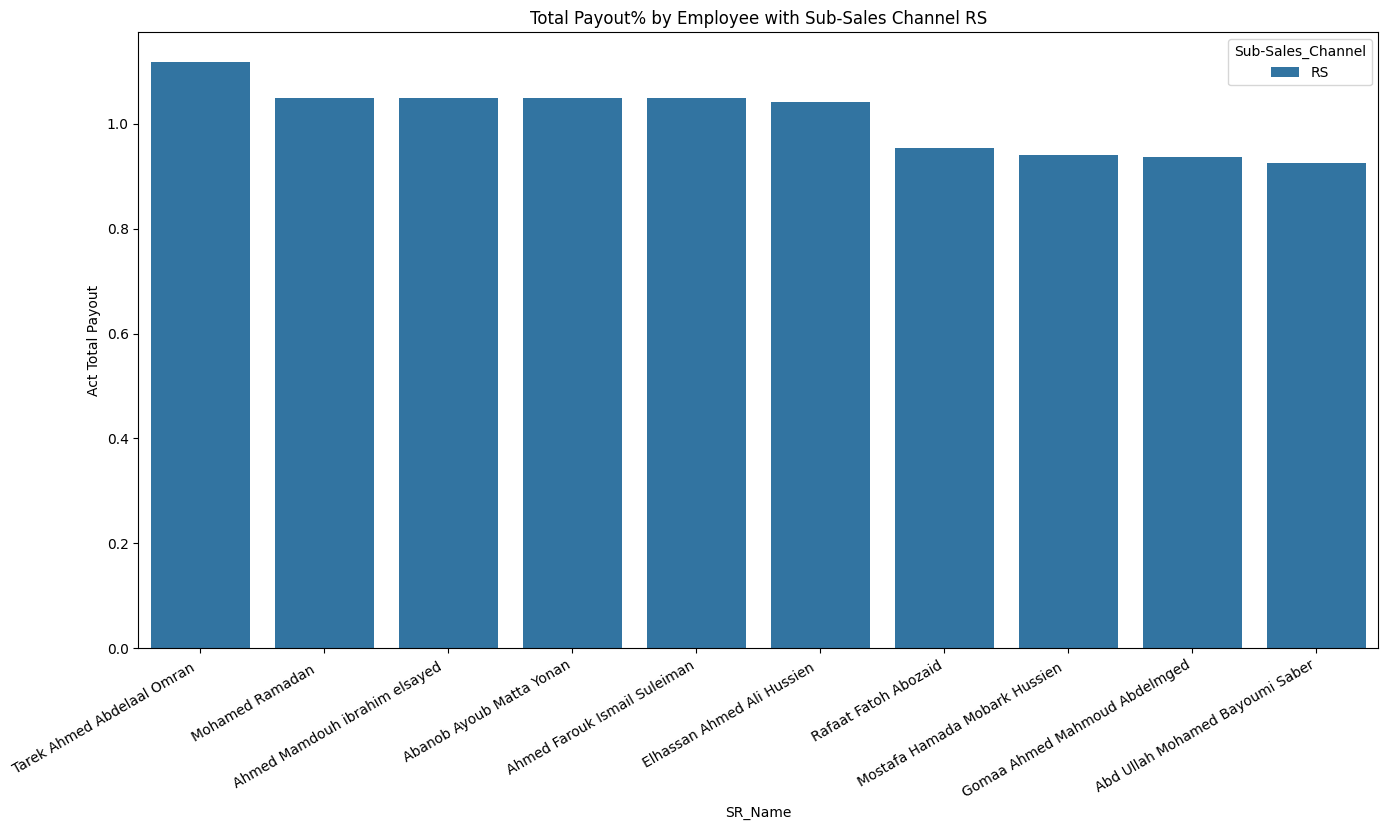

In [ ]:
# Employee Performance Evaluation
employee = Report_Master
employee["Repeated"] = 1

# Grouping and calculating the actual total payout
employee_performance = employee.groupby(['SR_Name', 'Sub-Sales_Channel'])[['Total Payout%', 'Repeated']].sum().reset_index()
employee_performance['Act Total Payout'] = employee_performance['Total Payout%'] / employee_performance['Repeated']

# Filter to include only Sub-Sales_Channel 'RS'
employee_performance_rs = employee_performance[employee_performance['Sub-Sales_Channel'] == 'RS']

# Sort values by 'Act Total Payout'
employee_performance_rs = employee_performance_rs.sort_values(by='Act Total Payout', ascending=False)

# Filter to top 10 employees
top_10_performance_rs = employee_performance_rs.head(10)

# Adjust the size of the plot
plt.figure(figsize=(16, 8))

# Create the barplot with hue
ax = sns.barplot(x='SR_Name', y='Act Total Payout', hue='Sub-Sales_Channel', data=top_10_performance_rs)

# Set the title of the plot
ax.set_title('Total Payout% by Employee with Sub-Sales Channel RS')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()


C:\Users\CompuMax\AppData\Local\Temp\ipykernel_32332\2794008931.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


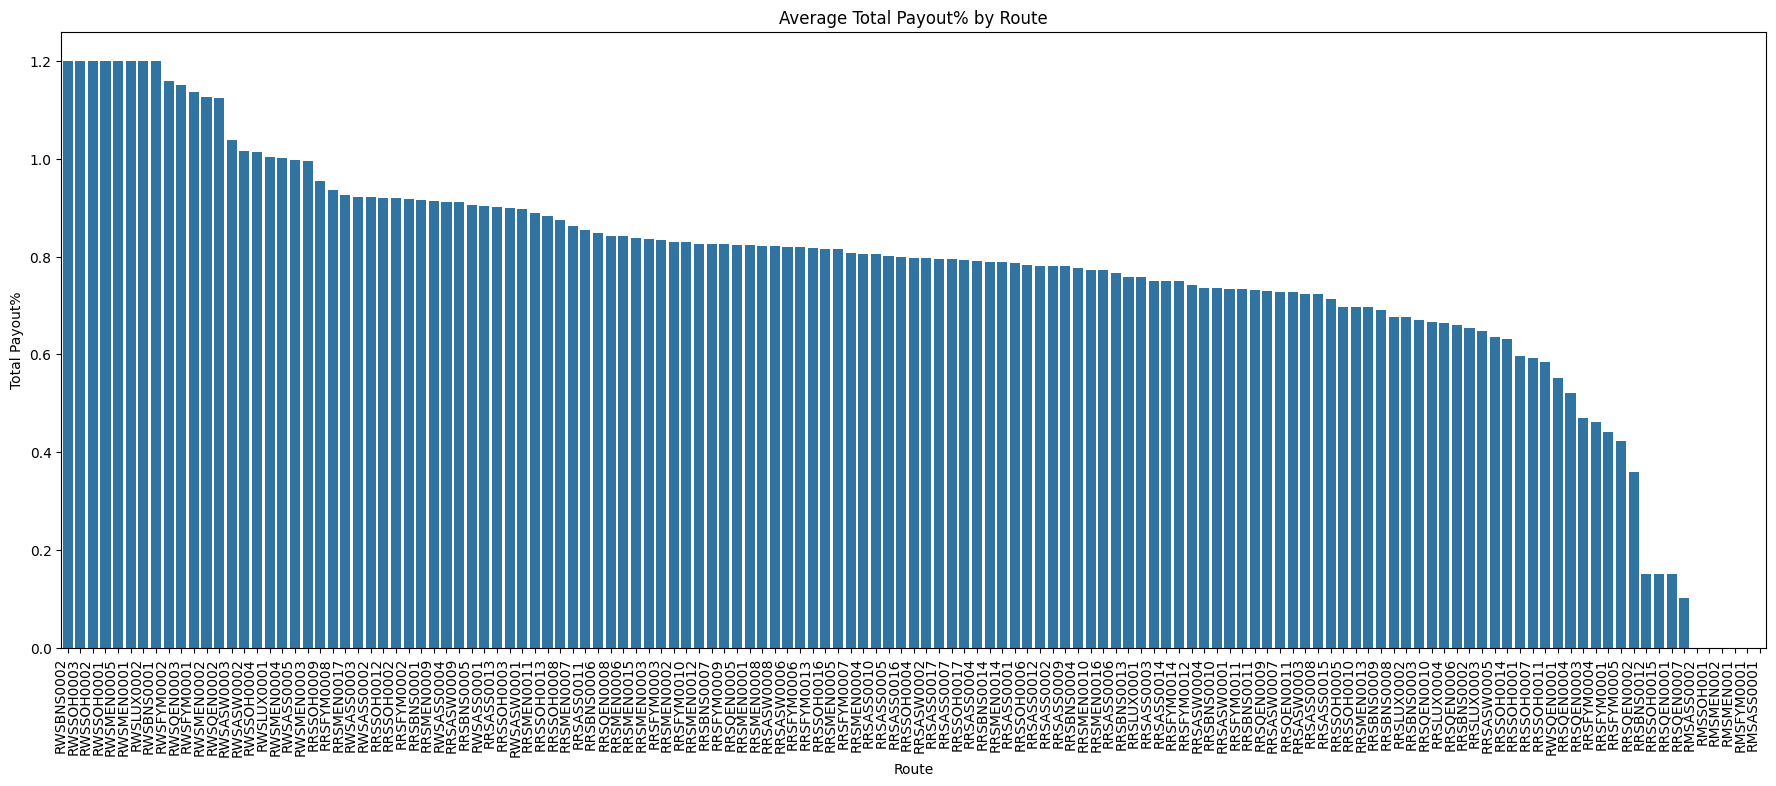

In [ ]:
# Route Performance Analysis
route_performance = Report_Master.groupby('Route')['Total Payout%'].mean().reset_index()
route_performance=route_performance.head(136).sort_values(by="Total Payout%", ascending=False).reset_index()

# Adjust the size of the plot
plt.figure(figsize=(22, 8))

ax= sns.barplot(x='Route', y='Total Payout%',data=route_performance)
ax.set_title('Average Total Payout% by Route')
# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

C:\Users\CompuMax\AppData\Local\Temp\ipykernel_32332\511462626.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


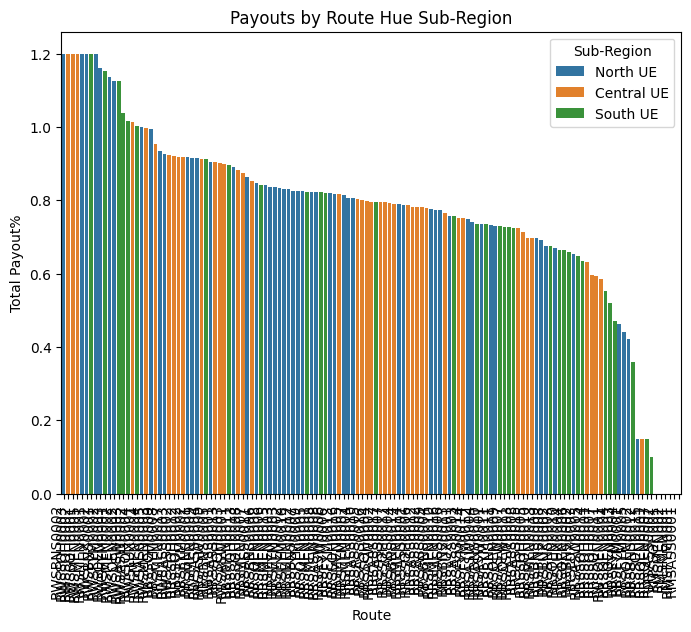

In [ ]:
#Create Data Frame to Analyize if the sub-Region Matters and how much does it do 
route_performance_new= pd.merge(route_performance,df_route_tr[["Route","Sub-Region","Branch"]],on="Route", how="inner")

#plot payouts by subregion
plt.figure(figsize=(8,6))
ax=sns.barplot(x="Route", y='Total Payout%',hue="Sub-Region", data=route_performance_new)
ax.set_title('Payouts by Route Hue Sub-Region')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()


C:\Users\CompuMax\AppData\Local\Temp\ipykernel_32332\2219165026.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


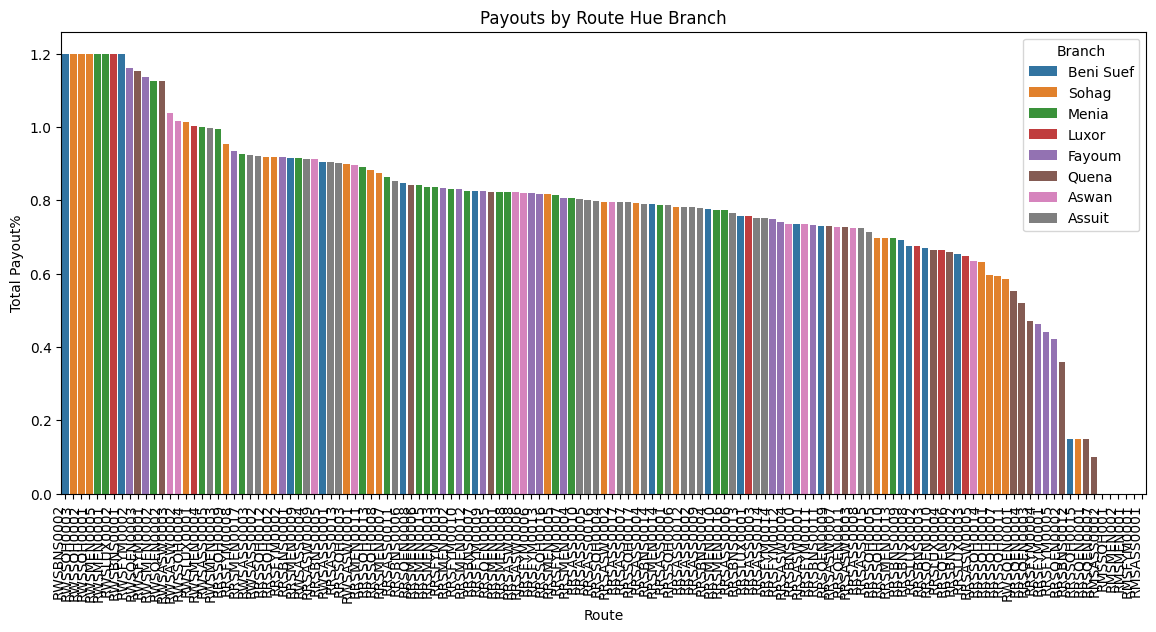

In [ ]:
#Create Data Frame to Analyize if the sub-Region Matters and how much does it do 
route_performance_new= pd.merge(route_performance,df_route_tr[["Route","Sub-Region","Branch"]],on="Route", how="inner")

#plot payouts by subregion
plt.figure(figsize=(14,6))
ax=sns.barplot(x="Route", y='Total Payout%',hue="Branch", data=route_performance_new)
ax.set_title('Payouts by Route Hue Branch')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

C:\Users\CompuMax\AppData\Local\Temp\ipykernel_32332\723377209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_achievement['Achieved_Target'] = target_achievement['Sales Achiv %'] >= target_achievement['Sales KPI Min Achiv. %']


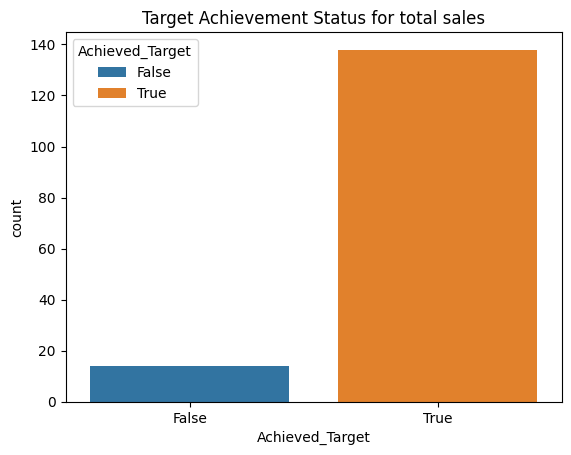

In [ ]:
# Target Achievement Total Sales Analysis
target_achievement = Report_Master[['SR_Name', 'Sales Achiv %', 'Sales KPI Min Achiv. %']]
target_achievement['Achieved_Target'] = target_achievement['Sales Achiv %'] >= target_achievement['Sales KPI Min Achiv. %']
sns.countplot(x='Achieved_Target', hue='Achieved_Target', data=target_achievement).set_title('Target Achievement Status for total sales')
plt.show()

C:\Users\CompuMax\AppData\Local\Temp\ipykernel_32332\2208374129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_achievement['Achieved_Target'] = target_achievement['jumbo Sales Achiv %'] >= target_achievement['Sales Jumbo Min Achiv. %']


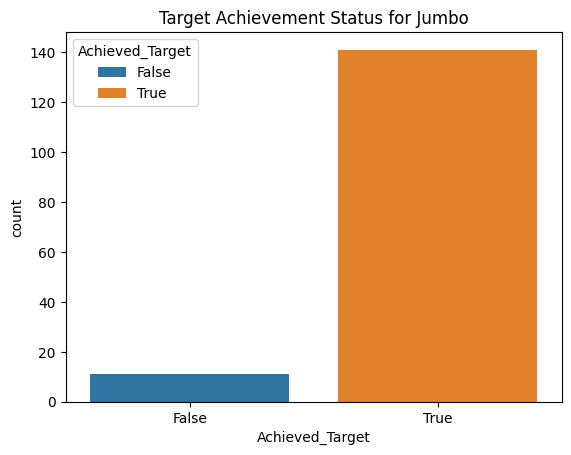

In [ ]:
# Target Achievement Jumbo Analysis
target_achievement = Report_Master[['SR_Name', 'jumbo Sales Achiv %', 'Sales Jumbo Min Achiv. %']]
target_achievement['Achieved_Target'] = target_achievement['jumbo Sales Achiv %'] >= target_achievement['Sales Jumbo Min Achiv. %']
sns.countplot(x='Achieved_Target', hue='Achieved_Target', data=target_achievement).set_title('Target Achievement Status for Jumbo')
plt.show()

C:\Users\CompuMax\AppData\Local\Temp\ipykernel_32332\1232069828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_achievement['Achieved_Target'] = target_achievement['Strike % Achiv. %'] >= target_achievement['Strike KPI Min Achiv. %']


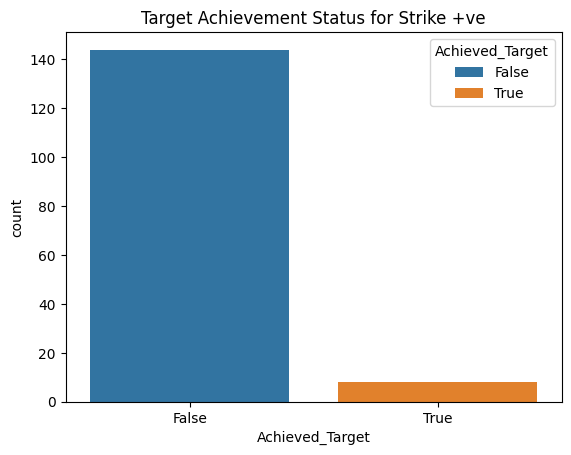

In [ ]:
# Target Achievement Strike +ve Analysis
target_achievement = Report_Master[['SR_Name', 'Strike % Achiv. %', 'Strike KPI Min Achiv. %']]
target_achievement['Achieved_Target'] = target_achievement['Strike % Achiv. %'] >= target_achievement['Strike KPI Min Achiv. %']
sns.countplot(x='Achieved_Target', hue='Achieved_Target', data=target_achievement).set_title('Target Achievement Status for Strike +ve')
plt.show()

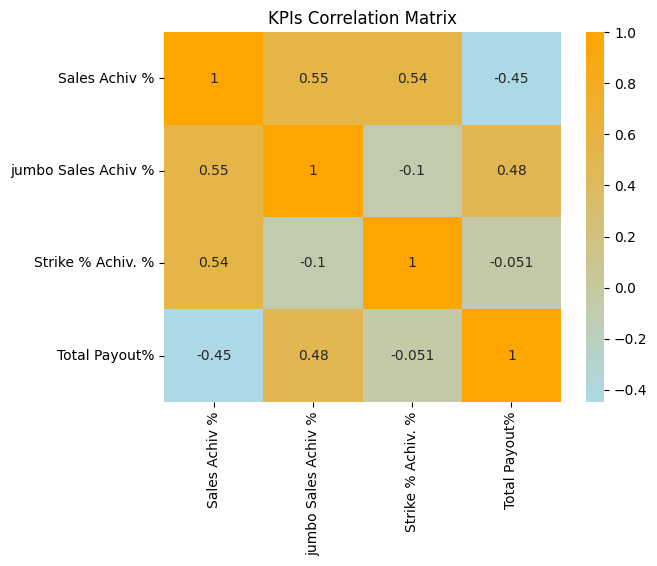

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom color palette from blue to orange
colors = ['lightblue', 'orange']
cmap = LinearSegmentedColormap.from_list('blue_orange', colors)

# Correlation Analysis
correlation_matrix = Report_Master[['Sales Achiv %', 'jumbo Sales Achiv %','Strike % Achiv. %', 'Total Payout%']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap=cmap).set_title('KPIs Correlation Matrix')
plt.show()

In [140]:
correlation_matrixxx = Report_Master[['Sales Achiv %', 'jumbo Sales Achiv %','Strike % Achiv. %', 'Total Payout%']]
correlation_matrixxx

,Sales Achiv %,jumbo Sales Achiv %,Strike % Achiv. %,Total Payout%
0,41.000000,NaN,NaN,0.000000
1,26.250000,NaN,1.000000,0.000000
2,25.000000,NaN,1.000000,0.000000
3,14.500000,NaN,1.000000,0.000000
4,21.087500,NaN,1.000000,0.000000
...,...,...,...,...
147,1.565826,4.761905,0.291066,1.200000
148,1.973638,9.464286,0.209125,1.200000
149,4.603846,11.458333,0.953488,1.295349
150,0.832692,5.787037,0.180488,0.732885


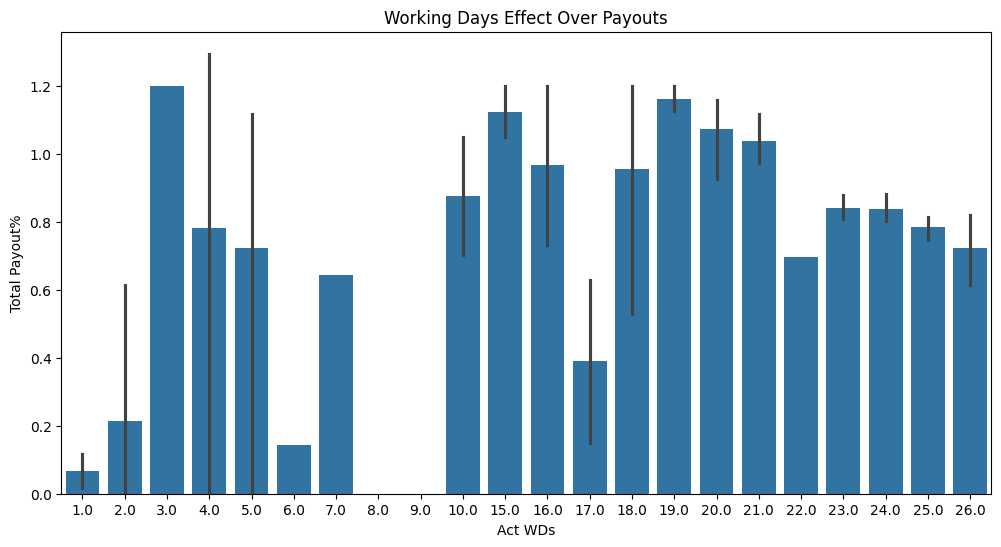

In [ ]:
#Analyize the effect of total working days over payouts
Report_Master
plt.figure(figsize=( 12,6))
ax=sns.barplot(x=Report_Master["Act WDs"].round(), y=Report_Master["Total Payout%"]).set_title("Working Days Effect Over Payouts")
plt.show()

In [ ]:
Report_Master[Report_Master["Act WDs"]==3]

,Route,SR_Code,SR_Name,SR Title,Sub-Sales_Channel,Act WDs,Act Sales Crt,Adj TGT Sales Crt,Sales Achiv %,jumbo Sales Achiv %,...,Sales KPI Min Achiv. %,Sales Jumbo Min Achiv. %,Strike KPI Min Achiv. %,Sales Payout %,Sales Jumbo Payout %,Strike % Payout %,Total Sales Payout%,jumbo Sales Payout%,Strike Payout%,Total Payout%
145,RWSQEN0003,DQENW002,Adnan Ahmed Hussien Hanfy,Rep,WS,3.0,665.0,204.0,3.259804,13.541667,...,0.8,0.8,0.9,0.7,0.1,0.1,1.05,0.15,0.0,1.2


----------------------------------------

Managment Level Analysis 

---------------------------------------

In [126]:
# Ensure the columns are correctly specified
columns_router_mapping = ['Region', 'Branch', 'Route', 'SSV_Code','SSV_Name' ,'ASM_Code', 'ASM_Name', 'Sub-Sales_Channel']
columns_report_master = ['Route', 'Sub-Sales_Channel', 'Sales Achiv %', 'jumbo Sales Achiv %','Strike % Achiv. %']

# Select the necessary columns from each DataFrame
df_router_mapping_selected = df_router_mapping[columns_router_mapping]
report_master_selected = Report_Master[columns_report_master]

# Perform the merge operation
Manager_Master = pd.merge(df_router_mapping_selected, report_master_selected, on=['Route', 'Sub-Sales_Channel'], how='inner')


In [130]:
#Add Route count to sum when merging
Manager_Master["Routes_Count"]=1

In [131]:
# Group by the specified columns and sum the selected columns
Manager_Master_Summed = Manager_Master.groupby(['Region', 'Branch','ASM_Code','ASM_Name', 'Sub-Sales_Channel'])[['Routes_Count', 'Sales Achiv %', 'jumbo Sales Achiv %', 'Strike % Achiv. %']].sum().reset_index()


In [133]:
#Divide Th sales% by number of routes to get Actual total
Manager_Master_Summed["Sales Achiv %"]=Manager_Master_Summed["Sales Achiv %"] /Manager_Master_Summed["Routes_Count"]
Manager_Master_Summed["jumbo Sales Achiv %"]=Manager_Master_Summed["jumbo Sales Achiv %"] /Manager_Master_Summed["Routes_Count"]
Manager_Master_Summed["Strike % Achiv. %"]=Manager_Master_Summed["Strike % Achiv. %"] /Manager_Master_Summed["Routes_Count"]


In [134]:
def Ms_sales_controller(df):
    """
    This function modifies the DataFrame by setting specific columns to NaN
    for rows where the sub-sales channel is 'MS'.

    Parameters:
    df (pd.DataFrame): The input DataFrame to be modified.

    Returns:
    pd.DataFrame: The modified DataFrame.
    """
    # Create a mask for rows where Sub-Sales_Channel is 'MS'
    ms_mask = df['Sub-Sales_Channel'] == 'MS'
    
    # Set specific columns to NaN for rows matching the mask
    df.loc[ms_mask, ['Sales Achiv %', 'jumbo Sales Achiv %', 'Strike % Achiv. %']] = np.NaN
    
    return df

# Example usage:
Manager_Master_Summed = Ms_sales_controller(Manager_Master_Summed)


In [135]:
# Define the total payout calculator function
def total_mangarial(salesachiv):
    if 1 < salesachiv < 1.5:
        return salesachiv
    elif salesachiv < 1:
        return 0
    elif salesachiv >= 1.5:
        return 1.5
    else:
        return 0

# Apply the function to the 'Sales Achiv %' column
Manager_Master_Summed["Total Payout%"] = Manager_Master_Summed["Sales Achiv %"].apply(total_mangarial)


In [136]:
#EXPORT FILE TO EXCEL
file_path = r"C:\Users\CompuMax\Downloads\Kylogs\Project Data\Manager_Master_Summed.xlsx"
Manager_Master_Summed.to_excel(file_path, index=False)

In [137]:
Manager_Master_Summed

,Region,Branch,ASM_Code,ASM_Name,Sub-Sales_Channel,Routes_Count,Sales Achiv %,jumbo Sales Achiv %,Strike % Achiv. %,Total Payout%
0,Upper Egypt,Assuit,DSVASS002,Sherif Mohamed,MS,2,NaN,NaN,NaN,0.000000
1,Upper Egypt,Assuit,DSVASS002,Sherif Mohamed,RS,17,1.069542,1.788161,0.654029,1.069542
2,Upper Egypt,Assuit,DSVASS002,Sherif Mohamed,WS,5,1.116642,3.897440,0.619181,1.116642
3,Upper Egypt,Aswan,DASMASSW01,Mohamed Mohamed,RS,9,1.039451,2.410210,0.605771,1.039451
4,Upper Egypt,Aswan,DASMASSW01,Mohamed Mohamed,WS,3,1.191322,9.548611,0.376329,1.191322
5,Upper Egypt,Beni Suef,KTSF000497,Yasser Ramadan,RS,15,1.034030,1.912945,0.533434,1.034030
6,Upper Egypt,Beni Suef,KTSF000497,Yasser Ramadan,WS,2,1.705096,5.156562,0.396862,1.500000
7,Upper Egypt,Fayoum,DASSFYM01,Ayman Khamis,MS,1,NaN,NaN,NaN,0.000000
8,Upper Egypt,Fayoum,DASSFYM01,Ayman Khamis,RS,17,0.981157,2.400833,0.483825,0.000000
9,Upper Egypt,Fayoum,KTSF000497,Ayman Khamis,WS,2,1.426061,3.608540,0.551592,1.426061


---------------------------------------------------------------------------


Managment Level Analysis


-------------------------------------------------------------------------------------